## Loading cluster catalogs

In [1]:
import chronos as cr

#to list available cluster catalogs
cr.cluster.CATALOG_LIST

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


['Bouma2019',
 'Babusiaux2018',
 'CantatGaudin2018',
 'Bossini2019',
 'Dias2014',
 'Karchenko2013',
 'Cody2018']

In [2]:
#initialize
cc = cr.ClusterCatalog(verbose=True)

#Bouma et al 2019 (largest catalog and used here as default)
df_mem = cc.query_catalog(name='Bouma2019', return_members=True)
df_mem.shape

Some parallaxes are negative in Bouma2019!
These are removed for the meantime.
For proper treatment, see:
https://arxiv.org/pdf/1804.09366.pdf



(1040410, 20)

In [3]:
#Cantat-Gaudin et al 2018
df_mem2 = cc.query_catalog(name='CantatGaudin2018', return_members=False)
df_mem2.shape

(1229, 18)

## search cluster members and properties

In [4]:
#compare IC_2602 members from two different catalogs

cluster_name = 'IC_2602'

c1 = cr.Cluster(catalog_name='Bouma2019', 
             cluster_name=cluster_name, 
             verbose=False)

c2 = cr.Cluster(catalog_name='CantatGaudin2018', 
             cluster_name=cluster_name, 
             verbose=False)

In [5]:
df1 = c1.query_cluster_members()
df2 = c2.query_cluster_members()

df1.shape, df2.shape

((4655, 20), (311, 15))

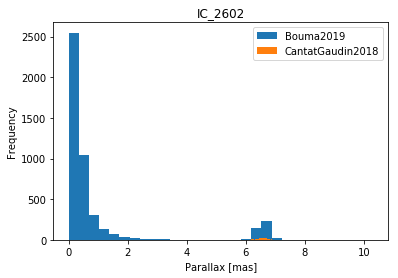

In [6]:
import matplotlib.pyplot as pl

df1.loc[df1.Cluster=='IC_2602','parallax'].plot(kind='hist', bins=30, label=c1.catalog_name)
df2.loc[df2.Cluster=='IC_2602','parallax'].plot(kind='hist', bins=30, label=c2.catalog_name)
pl.title(cluster_name)
pl.xlabel('Parallax [mas]')
pl.legend()

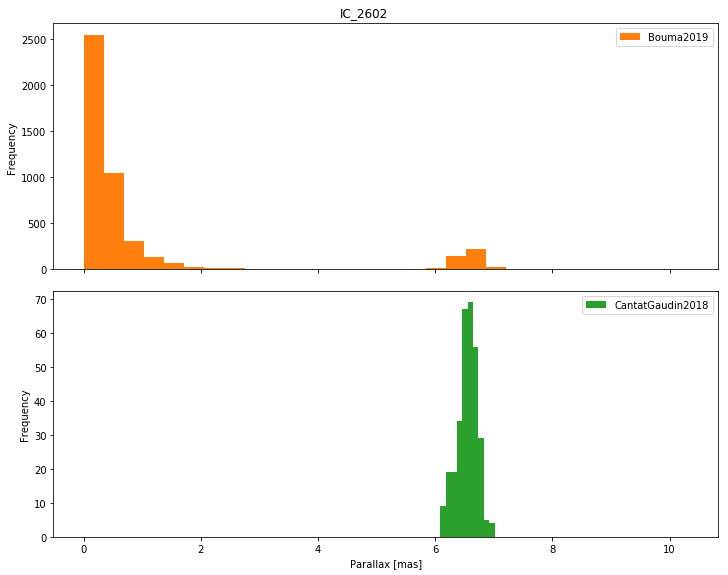

In [7]:
fig, ax = pl.subplots(2,1, figsize=(10,8), sharex=True, constrained_layout=True)

# df1.loc[df1.Cluster=='IC_2602','parallax'].plot(ax=ax[0], kind='kde', secondary_y=True, color='C1')
df1.loc[df1.Cluster=='IC_2602','parallax'].plot(ax=ax[0], kind='hist', color='C1', bins=30)
# df2.loc[df2.Cluster=='IC_2602','parallax'].plot(ax=ax[1], kind='kde', secondary_y=True, color='C2')
df2.loc[df2.Cluster=='IC_2602','parallax'].plot(ax=ax[1], kind='hist', color='C2')
ax[1].set_xlabel('Parallax [mas]')
fig.suptitle(cluster_name)
ax[0].legend([c1.catalog_name])
ax[1].legend([c2.catalog_name])

In [8]:
#Bouma have more members merged from other catalogs
df1.clusters.unique()

array(['IC2602,nan,IC2602,nan', 'IC_2602', 'IC2602',
       'IC2602,Oh_5,N/A,IC2602,Oh_5,N/A', 'IC2602,IC_2602',
       'IC_2602,IC2602', 'IC2602,IC_2602,nan,IC2602,IC_2602,nan',
       'IC_2602,nan,IC_2602,nan', 'IC_2602,IC_2602,IC2602', 'IC 2602',
       'IC_2602,IC 2602', 'IC 2602,Melotte_101', 'IC 2602,IC 2602',
       'IC_2602,IC2602,nan,IC_2602,IC2602,nan', 'IC 2602,nan,IC 2602,nan',
       'IC_2602,IC2602,IC_2602', 'IC 2602,IC_2602',
       'IC_2602,IC2602,IC_2602,nan,IC_2602,IC2602,IC_2602,nan',
       'IC 2602,Melotte 101', 'IC2602,IC_2602,IC_2602',
       'IC 2602,Melotte 101,Melotte_101',
       'IC 2602,Melotte_101,Melotte 101',
       'IC 2602,Melotte_101,Melotte 101,Melotte_101',
       'IC 2602,IC 2602,Melotte_101,Melotte_101,Melotte 101,Melotte 101',
       'IC 2602,Melotte 101,Melotte_101,Melotte_101',
       'IC_2602,Melotte_101',
       'IC 2602,Melotte 101,nan,IC 2602,Melotte 101,nan',
       'IC_2602,Melotte 101,IC 2602', 'IC 2602,Melotte 101,IC_2602',
       'IC 2

In [9]:
#reduce the redundant names above

from operator import concat
from functools import reduce 
import numpy as np

def reduce_list(l):
    rl = np.unique(reduce(concat, l))
    return rl

In [10]:
l = df1.loc[df1.Cluster=='IC_2602'].clusters.apply(lambda x: x.replace(' ','').replace('_','').split(','))
reduce_list(l)

array(['IC2602', 'Melotte101', 'N/A', 'Oh5', 'nan'], dtype='<U10')

In [11]:
l = df1.loc[df1.Cluster=='IC_2602'].reference.apply(lambda x: x.split(','))
reduce_list(l)

array(['CantatGaudin_2018', 'Dias2014', 'Gagne_2018_BANYAN_XI',
       'GaiaCollaboration2018_tab1a', 'Kharchenko2013',
       'Oh_2017_clustering', 'Zari_2018_PMS', 'Zari_2018_UMS'],
      dtype='<U27')

In [12]:
#Bouma has majority of IC2602 members from: 
df1[df1.reference.isin(['Dias2014', 'Kharchenko2013'])].shape

(3927, 20)

## find nearest cluster to target

In [13]:
t = cr.Target(gaiaDR2id=5576476552334683520, verbose=False)
d = t.query_gaia_dr2_catalog(return_nearest_xmatch=True)

In [14]:
#3d coordinates
t.target_coord

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, pc)
    (102.65804253, -37.96023412, 223.73943744)>

In [15]:
nearest_cluster_member = t.find_nearest_cluster_member(match_id=False)

Some parallaxes are negative in Bouma2019!
These are removed for the meantime.
For proper treatment, see:
https://arxiv.org/pdf/1804.09366.pdf



In [16]:
#nearest star in a cluster
t.nearest_cluster_member

source_id                                           45743570662353024
clusters                                                   Melotte 25
reference                                                    Dias2014
ext_catalog_name                                           533-008368
ra                                                            64.0857
dec                                                           16.5097
pmra                                                              NaN
pmdec                                                             NaN
parallax                                                          NaN
phot_g_mean_mag                                               14.4887
phot_bp_mean_mag                                               15.076
phot_rp_mean_mag                                              13.4803
k13_name_match                                             Melotte_25
Cluster                                                    Melotte_25
how_match           

In [17]:
#nearest cluster
t.nearest_cluster_members

,source_id,clusters,reference,ext_catalog_name,ra,dec,pmra,pmdec,parallax,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,k13_name_match,Cluster,how_match,not_in_k13,comment,k13_logt,k13_e_logt,distance
346,45645301810449664,Melotte 25,Dias2014,532-007927,63.928767,16.290613,5.133255,2.013622,0.994975,14.176143,14.834952,13.389873,Melotte_25,Melotte_25,K13_index_table_string_match,False,"K13index: possibly this is a cluster, but para...",NaN,NaN,1005.050634
347,45645679767571072,Melotte 25,Dias2014,532-007929,63.944675,16.308163,1.552334,1.755407,0.522951,15.875837,16.474293,15.127310,Melotte_25,Melotte_25,K13_index_table_string_match,False,"K13index: possibly this is a cluster, but para...",NaN,NaN,1912.226749
348,45645989005215616,Melotte 25,Dias2014,532-007926,63.925646,16.330320,6.919474,-4.316495,1.089684,16.752245,17.581797,15.849460,Melotte_25,Melotte_25,K13_index_table_string_match,False,"K13index: possibly this is a cluster, but para...",NaN,NaN,917.697202
352,45740272127474304,Melotte 25,Dias2014,532-007939,64.037664,16.393466,-0.228894,-3.205864,0.383354,16.566547,17.332075,15.682869,Melotte_25,Melotte_25,K13_index_table_string_match,False,"K13index: possibly this is a cluster, but para...",NaN,NaN,2608.557645
353,45740547005380992,Melotte 25,Dias2014,533-008356,64.021685,16.408766,2.704390,-1.312295,0.901625,16.284498,17.010864,15.445896,Melotte_25,Melotte_25,K13_index_table_string_match,False,"K13index: possibly this is a cluster, but para...",NaN,NaN,1109.108599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513900,3314527352969805312,"Melotte 25,Melotte 25","Dias2014,Dias2014","543-009628,543-009629",67.267659,18.424263,7.569343,-5.699585,0.755857,16.061941,16.967373,15.081229,Melotte_25,Melotte_25,K13_index_table_string_match,False,"K13index: possibly this is a cluster, but para...",NaN,NaN,1323.001655
513902,3314528310746224128,Melotte 25,Dias2014,543-009637,67.309520,18.499896,-1.065479,-3.577588,0.685797,16.952353,17.924576,15.945135,Melotte_25,Melotte_25,K13_index_table_string_match,False,"K13index: possibly this is a cluster, but para...",NaN,NaN,1458.158441
513903,3314529895590433280,Melotte 25,Dias2014,543-009643,67.360022,18.533393,2.877971,-11.134698,1.213020,14.206573,15.191239,13.213704,Melotte_25,Melotte_25,K13_index_table_string_match,False,"K13index: possibly this is a cluster, but para...",NaN,NaN,824.388454
513904,3314530101748860928,Melotte 25,Dias2014,543-009647,67.404217,18.541789,5.351107,-9.572095,2.176240,15.193776,16.335903,14.124325,Melotte_25,Melotte_25,K13_index_table_string_match,False,"K13index: possibly this is a cluster, but para...",NaN,NaN,459.508093


In [18]:
t.nearest_cluster_name

'Melotte_25'

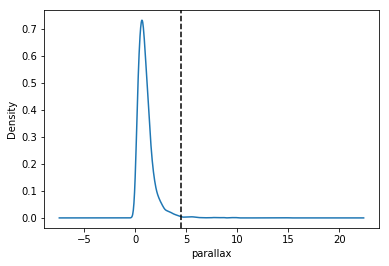

In [19]:
#plot parallax distribution of cluster members 
fig = t.nearest_cluster_members.parallax.plot.kde()
fig.axes.set_xlabel('parallax')
fig.axes.axvline(t.gaia_params.parallax, 0, 1, c='k', ls='--')

## plotting

### Color-Magnitude diagram

In [20]:
t = cr.Target(gaiaDR2id=5251470948229949568, verbose=False)
df_gaia = t.query_gaia_dr2_catalog(return_nearest_xmatch=True)

In [21]:
t.find_nearest_cluster_member()

Some parallaxes are negative in Bouma2019!
These are removed for the meantime.
For proper treatment, see:
https://arxiv.org/pdf/1804.09366.pdf



,source_id,clusters,reference,ext_catalog_name,ra,dec,pmra,pmdec,parallax,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,k13_name_match,Cluster,how_match,not_in_k13,comment,k13_logt,k13_e_logt,distance
704039,5251470948229949568,"IC2602,IC_2602,IC_2602","GaiaCollaboration2018_tab1a,CantatGaudin_2018,...","5251470948229949568,5251470948229949568,786691642",157.037281,-64.505211,-18.016542,11.306775,6.989271,10.355962,10.695068,9.887476,IC_2602,IC_2602,string_match,False,NaN,8.345,NaN,143.076438


In [ ]:
# c = cr.Cluster(cluster_name='IC_2602')
df_gaia_mem = c.query_cluster_members_gaia_params(data_loc='../data/')
df_gaia_mem.shape

In [ ]:
#CMD diagram
ax = cr.plot_cmd(df=df_gaia_mem, target_gaia_id=t.gaiaid);
ax.set_title(t.nearest_cluster_name)

In [ ]:
cc = cr.ClusterCatalog(verbose=False)
df = cc.query_catalog(name='Bossini2019')
idx = df.Cluster.isin([t.nearest_cluster_name])
d = df[idx]

In [ ]:
d

### kinematics

In [ ]:
t = cr.Target(gaiaDR2id=5251470948229949568, verbose=False)
df_gaia_target = t.query_gaia_dr2_catalog(return_nearest_xmatch=True)
df_gaia_nearest_star = t.find_nearest_cluster_member()

fig = cr.plot.plot_xyz_3d(t.nearest_cluster_members, target_gaiaid=t.gaiaid, zlim=(0,100));
fig.suptitle(t.nearest_cluster_name);

Bouma2019 catalog do not have radial_velocity so we need to query gaia catalog for each members.

In [ ]:
c = cr.Cluster(catalog_name='CantatGaudin2018', 
            cluster_name='IC_2602', 
            verbose=False)

#query radial_velocity for each star from gaia dr2 catalog
#trim faint cluster members with Gmag cut, but still include the target 
df_gaia_mem = c.query_cluster_members_gaia_params(gmag_cut=14, clobber=False)
df_gaia_mem.shape

In [ ]:
fig = cr.plot_rdp_pmrv(df=df_gaia_mem, target_gaia_id=t.gaiaid);
fig.suptitle(t.nearest_cluster_name)

### kinematics (galactocentric frame)

In [ ]:
fig = cr.plot_xyz_uvw(df=df_gaia_mem, target_gaia_id=t.gaiaid);
fig.suptitle(t.nearest_cluster_name)

## get gaia params for each TOI

In [ ]:
toi_gaia_params = cr.query_gaia_params_of_all_tois(verbose=True, clobber=False, update=True)

In [ ]:
toi_gaia_params.tail()

## get nearest cluster for each TOI

See scripts and also known_cluster_host_stars.ipynb.

## Interactive plot

In [ ]:
import altair as alt
alt.renderers.enable('notebook')

cr.plot_interactive()

## everest lightcurves

In [ ]:
%matplotlib inline
import chronos as cr

eve = cr.Everest(epicid=211314705, campaign=5, verbose=False)
eve.lc.scatter()

In [ ]:
k2sff = cr.K2SFF(epicid=211314705, campaign=5, verbose=False)
k2sff.lc.scatter()

## isochrone fitting

## Clustering algorithms
* [DBSCAN](https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py)
* [affinity Propagation](https://scikit-learn.org/stable/auto_examples/cluster/plot_affinity_propagation.html#sphx-glr-auto-examples-cluster-plot-affinity-propagation-py)

In [ ]:
c = cr.Cluster(catalog_name='Bouma2019', 
             cluster_name='IC_2602', 
             verbose=False)
df = c.query_cluster_members()

In [ ]:
from sklearn.cluster import AffinityPropagation
df.plot.scatter(x='ra',y='dec')

In [ ]:
X = df[['ra','dec','parallax']].values